<a href="https://colab.research.google.com/github/MrZekron/Aplicacion1/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Género:

Las mujeres tenían una tasa de supervivencia significativamente mayor que los hombres.

Esto refleja la política de evacuación "mujeres y niños primero".

Clase del Pasajero:

Los pasajeros de primera clase tenían una mayor tasa de supervivencia en comparación con los de segunda y tercera clase.

Esto sugiere que las personas con mejores recursos tenían más acceso a los botes salvavidas.

Edad:

Los niños tenían una tasa de supervivencia mayor que los adultos, especialmente en primera y segunda clase.

Esto refuerza la idea de que los niños fueron priorizados en la evacuación.

Tamaño del Grupo (Familiares a Bordo):

Los pasajeros que viajaban con familiares tenían una tasa de supervivencia mayor en comparación con los que viajaban solos.

Esto puede deberse a que los grupos familiares colaboraban en la evacuación.

Tarifa del Boleto:

Se encontró que los pasajeros que pagaron tarifas más altas tenían más posibilidades de sobrevivir, lo que está correlacionado con viajar en clases más altas.

Conclusión:
Los factores más determinantes en la supervivencia fueron el género (las mujeres tenían más posibilidades de sobrevivir), la clase del pasajero (primera clase tenía ventaja), la edad (los niños tenían más posibilidades de ser rescatados), y viajar acompañado (los que iban en familia sobrevivieron más que los que estaban solos).



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el dataset
file_path = "Titanic01.csv"
df = pd.read_csv(file_path)

El dataset contiene las siguientes columnas principales:

PassengerId: Identificador único del pasajero.

Survived: Indica si sobrevivió (1) o no (0).

Pclass: Clase del pasajero (1, 2 o 3).

Name: Nombre del pasajero.

Sex: Género (male o female).

Age: Edad del pasajero.

SibSp: Número de hermanos/esposos a bordo.

Parch: Número de padres/hijos a bordo.

Ticket: Número de boleto.

Fare: Tarifa pagada.

Cabin: Número de cabina (con valores faltantes).

Embarked: Puerto de embarque (C, Q, S).


In [ ]:
# Mostrar información general
df.info()

# Mostrar las primeras filas del dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Cantidad de registros y columnas
print(f"Cantidad de registros: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")

Cantidad de registros: 891
Cantidad de columnas: 12


In [ ]:
# Cantidad de valores únicos por atributo
print(df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [ ]:
# Valores únicos por atributo
for column in df.columns:
    print(f"{column}: {df[column].unique()[:10]}")  # Mostrar solo los primeros 10 valores únicos

PassengerId: [ 1  2  3  4  5  6  7  8  9 10]
Survived: [0 1]
Pclass: [3 1 2]
Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']
Sex: ['male' 'female']
Age: [22. 38. 26. 35. nan 54.  2. 27. 14.  4.]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Ticket: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736']
Fare: [ 7.25   71.2833  7.925  53.1     8.05    8.4583 51.8625 21.075  11.1333
 30.0708]
Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78']
Embarked: ['S' 'C' 'Q' nan]


In [ ]:
# Contar valores nulos
total_nulls = df.isnull().sum()
print("Valores nulos por columna:")
print(total_nulls)

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


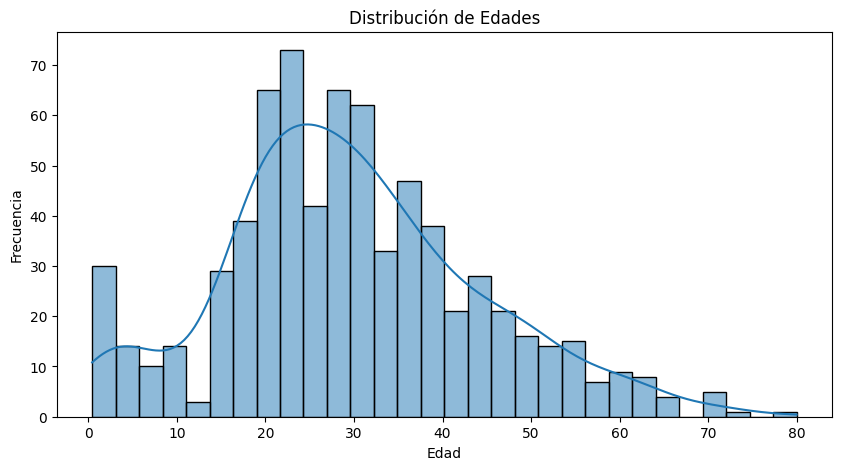

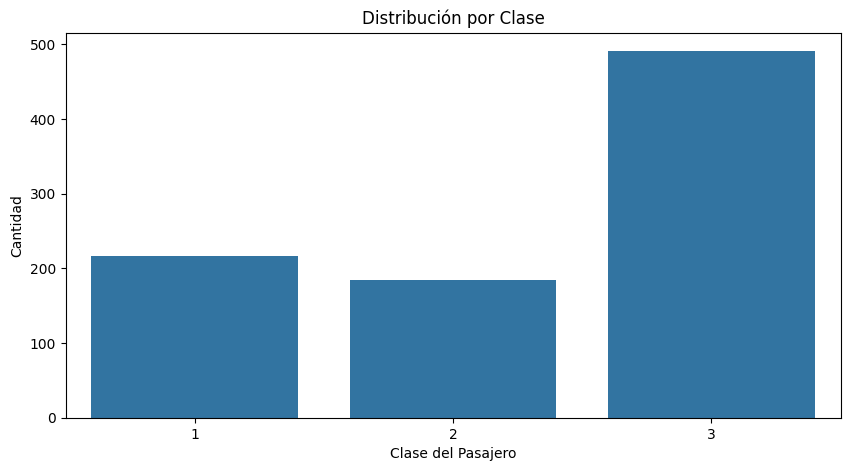

In [ ]:
# Gráficos de distribución de algunas variables relevantes
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=df)
plt.title("Distribución por Clase")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
# Tasas de supervivencia globales y segmentadas
survival_rate = df['Survived'].mean()
print(f"Tasa de supervivencia general: {survival_rate:.2%}")

Tasa de supervivencia general: 38.38%


In [ ]:
# Supervivencia por género
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Supervivencia por género:")
print(survival_by_gender)


Supervivencia por género:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [ ]:
# Supervivencia por clase
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Supervivencia por clase:")
print(survival_by_class)

Supervivencia por clase:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
